In [1]:
import torch
import sys

sys.path.append('..')

from SourceCode import *

from math import pi, e
import matplotlib.pyplot as plt
import time
dh = 1e-3


n_epochs = 10
n_points = 10

# № 0

$$y'' - y = 0 $$
$$ y(0) = 0 $$
$$ y(1) = 1 $$
$$ true\_sol = \frac{e}{e*e-1}e^x+\frac{e}{1-e*e}e^{-x} $$

In [2]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    - nn_model(x)
)
n_points = 10

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor(1.0, requires_grad=True)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_params = {'hidden_dim': 5, 'num_hidden_layers': 1}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.2, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

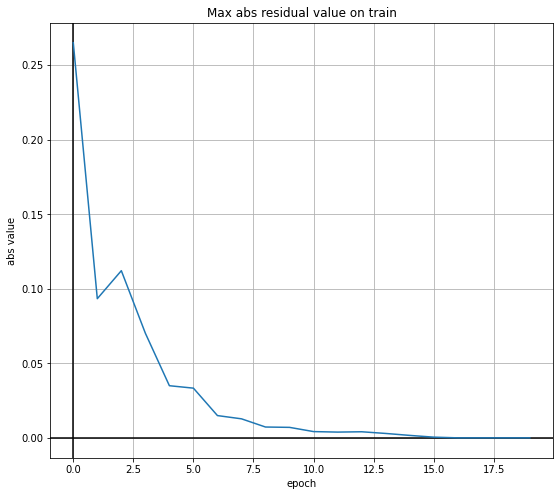

In [3]:
analytical_solution = lambda x: e/(e*e-1)*torch.exp(x) + e/(1-e*e)*torch.exp(-x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                         main_eq_residuals=main_eq_residual
                         )
report.print_loss_history()

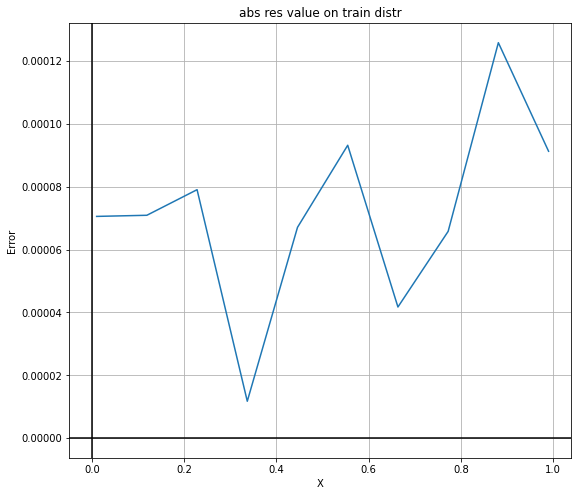

In [4]:
report.plot_abs_residual_distr('train')

Max residual value |R[NN]| on train: 0.000125885009765625
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 5.066394805908203e-06
Valid max absolute error |Appr(x)-y(x)|: 4.291534423828125e-06
MAPE on train data: 0.0006576316081918776 %
MAPE on validation data: 0.0005950548256805632 %
Max abs value of residual on train at last epoch: 0.00012314319610595703 


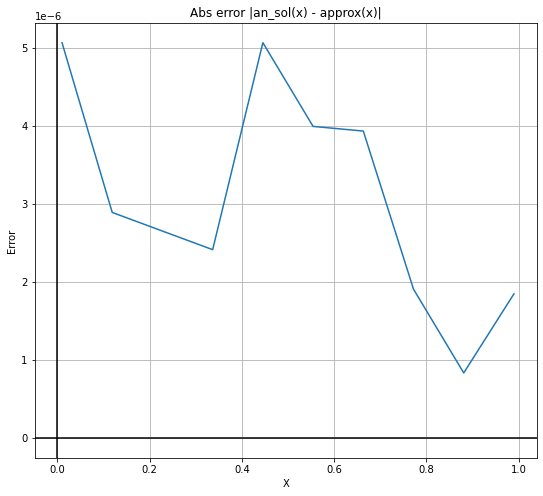

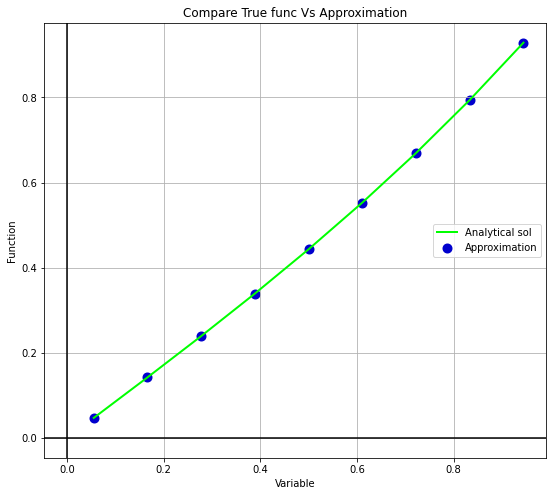

In [5]:
report.compare_appr_with_analytical()

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 10

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_params = {'hidden_dim': 20, 'num_hidden_layers': 2}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.2, 
)
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
loss_train, loss_valid, abs_error_train, abs_error_valid, nn_model = nn_ode_solver.fit_with_abs_err_history(main_domain, analytical_sols=[analytical_solution])

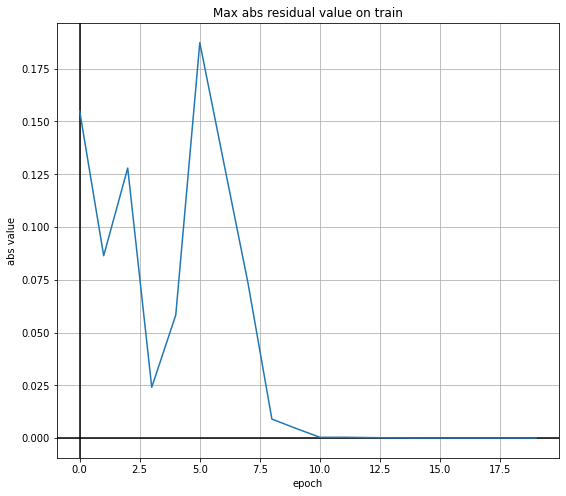

In [8]:
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                         main_eq_residuals=main_eq_residual
                         )
report.print_loss_history()

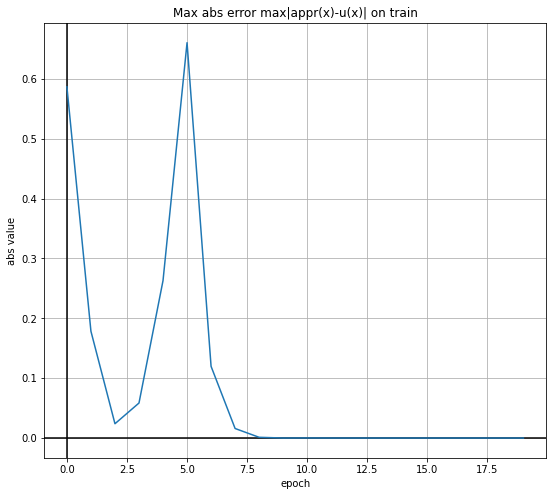

In [9]:
report.plot_abs_error_history(abs_error_train)

Max residual value |R[NN]| on train: 3.2529234886169434e-05
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.76837158203125e-07
Valid max absolute error |Appr(x)-y(x)|: 6.556510925292969e-07
MAPE on train data: 5.463251682158443e-05 %
MAPE on validation data: 7.867429872021603e-05 %
Max abs value of residual on train at last epoch: 3.2529234886169434e-05 


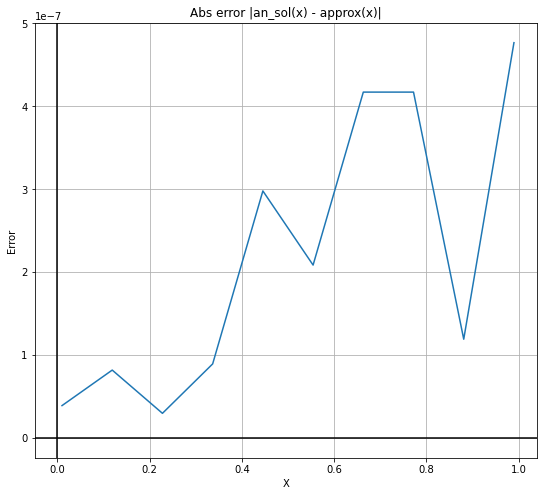

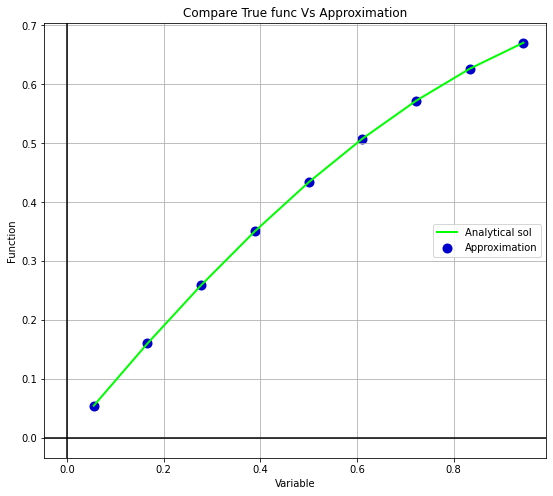

In [10]:
report.compare_appr_with_analytical()

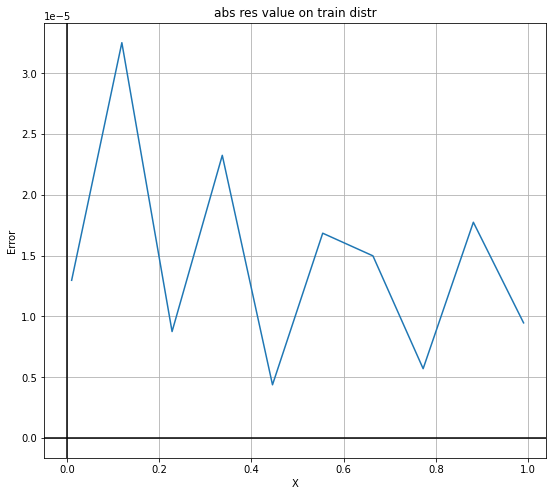

In [11]:
report.plot_abs_residual_distr()

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [12]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 80
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.2, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

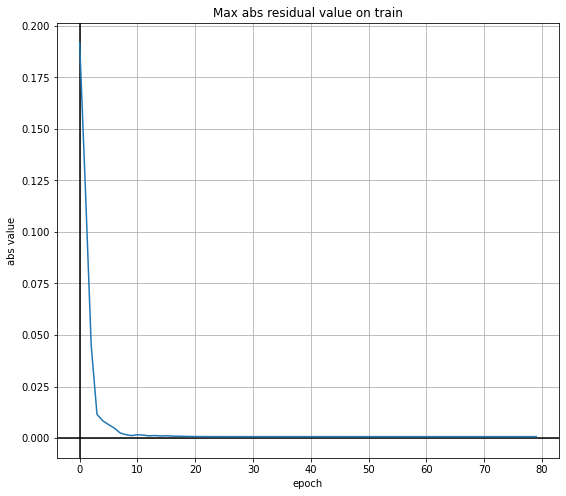

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 2.968311309814453e-05
Valid max absolute error |Appr(x)-y(x)|: 2.9981136322021484e-05
MAPE on train data: 0.004075764081790112 %
MAPE on validation data: 0.004027591421618126 %
Max abs value of residual on train at last epoch: 0.0006798133254051208 


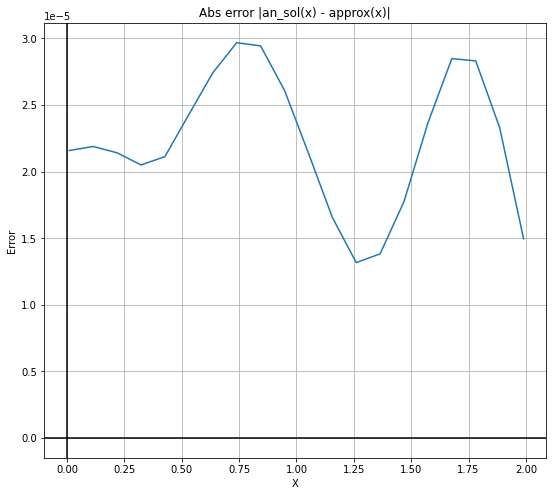

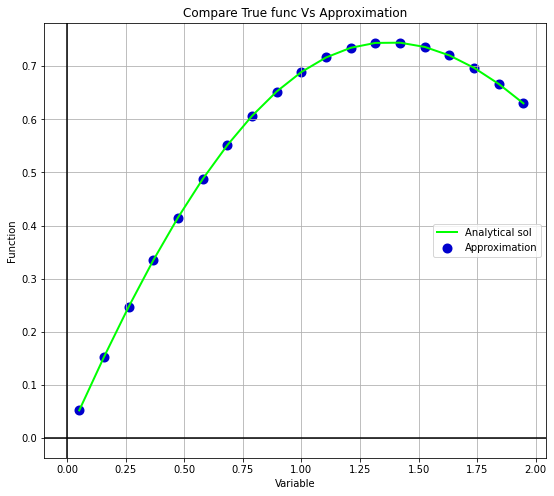

In [13]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [14]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 40
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.2, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

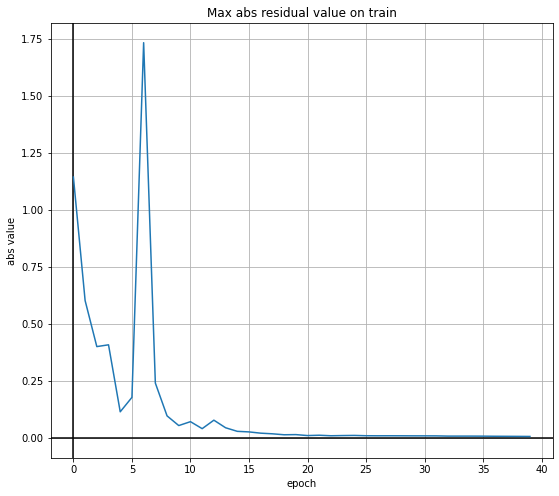

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0006543397903442383
Valid max absolute error |Appr(x)-y(x)|: 0.0006527900695800781
MAPE on train data: 0.06052565877325833 %
MAPE on validation data: 0.06094136624597013 %
Max abs value of residual on train at last epoch: 0.006947338581085205 


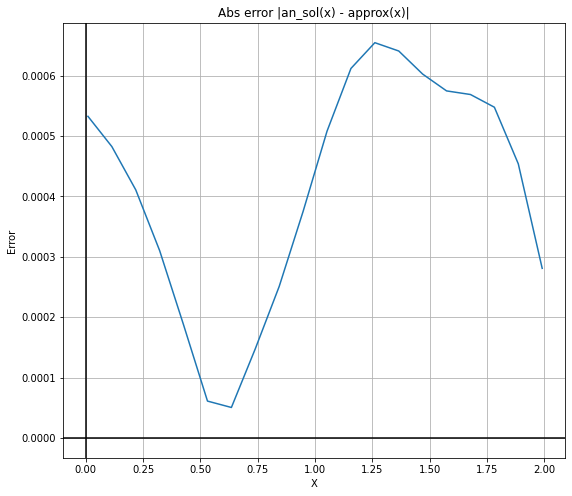

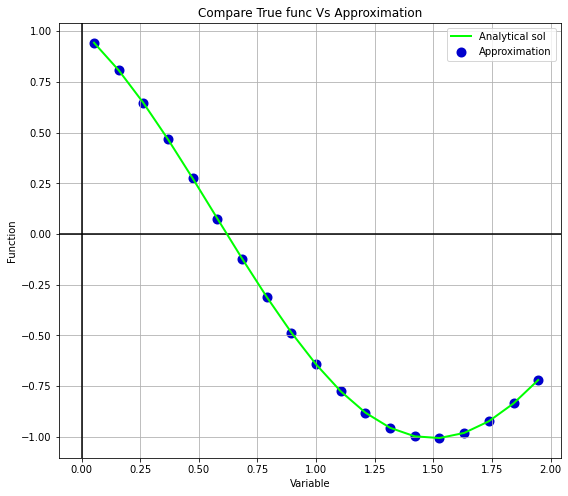

In [15]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [16]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    - 1
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model(x), x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.2, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

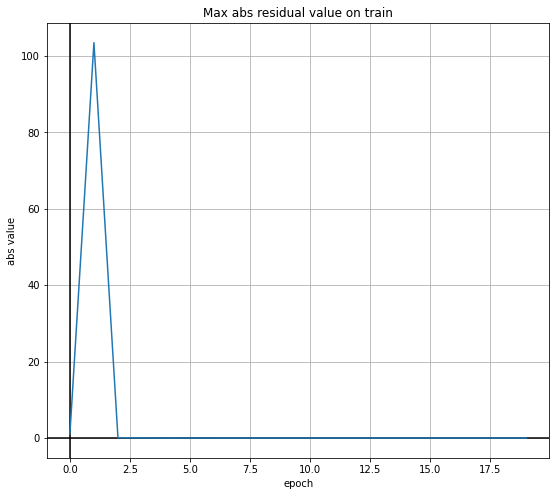

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 1.633167266845703e-05
Valid max absolute error |Appr(x)-y(x)|: 1.6570091247558594e-05
MAPE on train data: 0.0005608450919680763 %
MAPE on validation data: 0.0005619459898298373 %
Max abs value of residual on train at last epoch: 0.0002543926239013672 


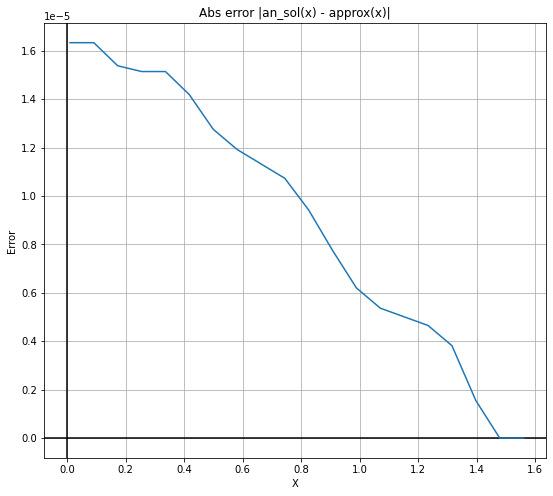

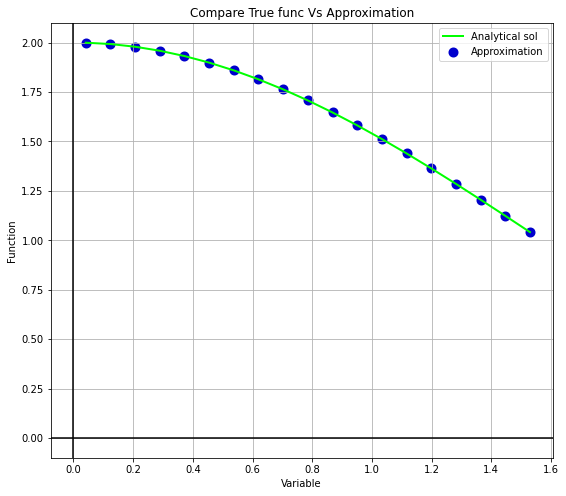

In [17]:
analytical_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [22]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 4)
    + nth_derivative(function(variable), variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions,
                           bound_cond_coef=0.1)

n_epochs = 40
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.5, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

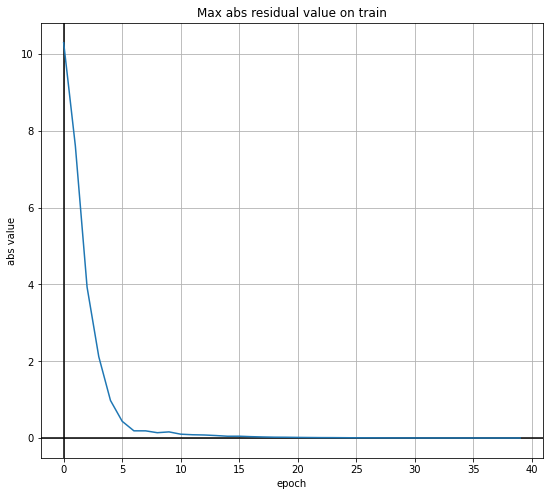

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 2.384185791015625e-05
Valid max absolute error |Appr(x)-y(x)|: 2.3484230041503906e-05
MAPE on train data: 0.002140296419383958 %
MAPE on validation data: 0.0021558274966082536 %
Max abs value of residual on train at last epoch: 0.0008705854415893555 


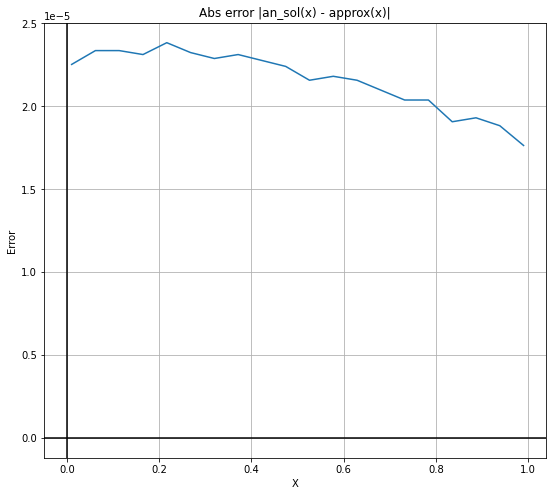

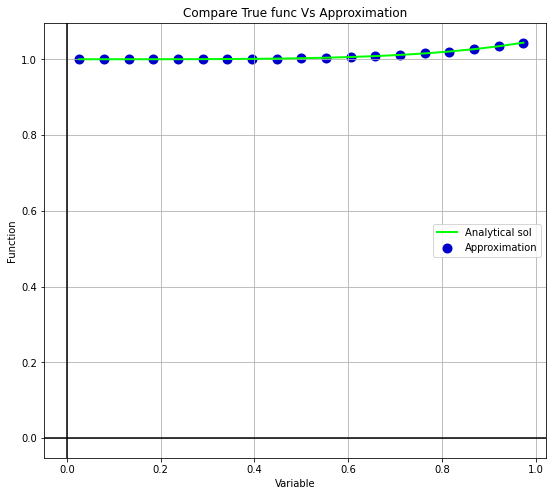

In [23]:
analytical_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [26]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.1, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

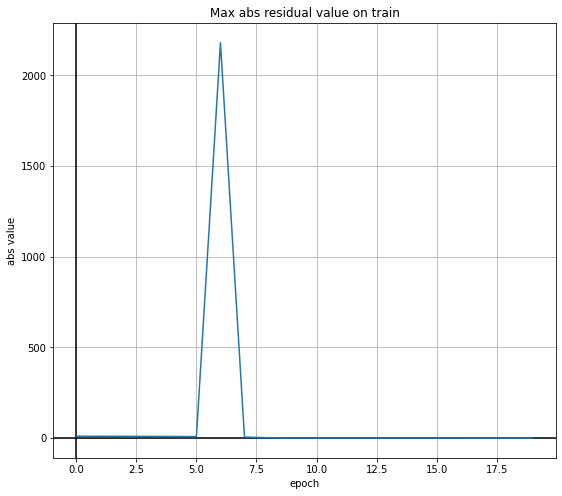

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0093994140625
Valid max absolute error |Appr(x)-y(x)|: 0.009349822998046875
MAPE on train data: 0.014742142229806632 %
MAPE on validation data: 0.014779844786971807 %
Max abs value of residual on train at last epoch: 0.04418760538101196 


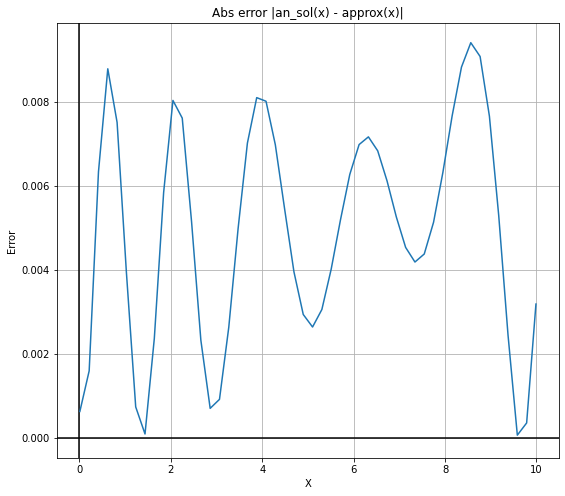

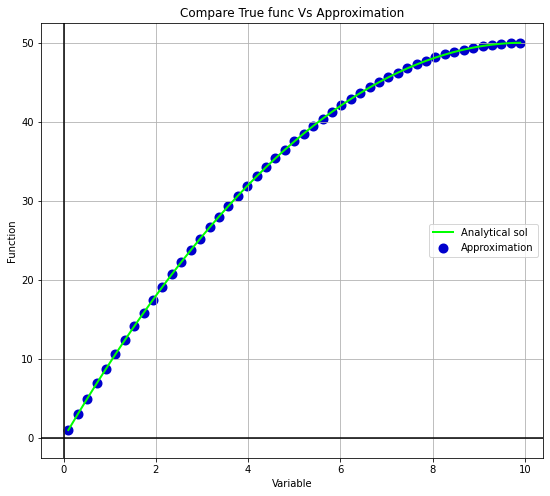

In [27]:
analytical_solution = lambda x: k*m/(2*l)*(2*l-x)*x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()